# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [21]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

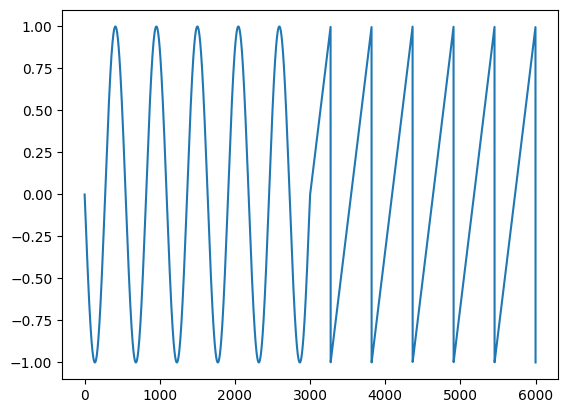

In [4]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

Первая половина временного ряда (от 0 до 3000) представляет собой синусоидальную волну, а вторая половина (от 3000 до 6000) — пилообразную волну. Эти два типа сигналов объединены в один временной ряд для дальнейшего анализа.

In [5]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


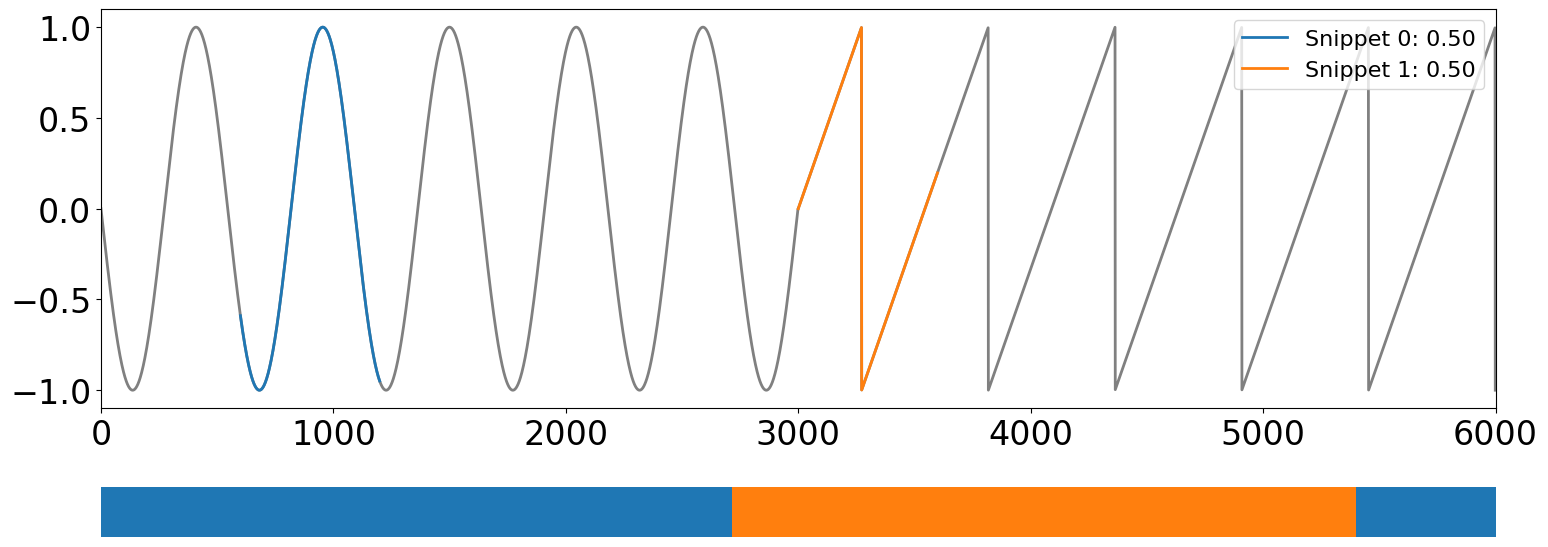

<Axes: >

In [6]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [7]:
import pandas as pd

df = pd.read_csv('./datasets/PAMAP/PAMAP.txt', delimiter=' ', header=None).T

df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.875540,0.319610,9.10631,-1.642520,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.677900,0.379878,8.90965,-1.416770,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.441670,0.606483,8.89380,-1.236830,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.595650,0.772609,8.99907,-1.237530,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.827400,0.938327,9.21025,-1.419260,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145995,2305.66,4.0,NaN,35.6875,2.140840,7.09274,-0.213018,2.107840,7.31908,-0.041456,0.256645,-0.568124,0.005918,-12.27830,-50.9797,20.50000,0.566790,-0.673692,-0.347012,-0.323220
145996,2305.67,4.0,NaN,35.6875,2.027390,6.56647,-0.135921,2.015190,6.94196,-0.041992,0.221546,-0.501649,0.103945,-12.52640,-51.7445,20.64360,0.566736,-0.675315,-0.345593,-0.321443
145997,2305.68,4.0,NaN,35.6875,1.978930,6.11268,-0.445092,1.861420,6.39894,-0.027528,0.162119,-0.355711,0.133332,-11.76720,-51.6443,21.35340,0.566580,-0.676581,-0.344391,-0.320344
145998,2305.69,4.0,NaN,35.6875,1.677590,5.73813,-0.294450,1.707950,5.96165,-0.073210,0.122680,-0.262807,0.188172,-12.41520,-51.3625,21.34730,0.566308,-0.677672,-0.343209,-0.319786


In [8]:
filtered_df = df[(df.iloc[:, 0] > 1790) & (df.iloc[:, 0] < 1930)]

ts = filtered_df.iloc[:, 11].to_numpy()

In [ ]:
snp = snippets(ts, 700, 2)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

700


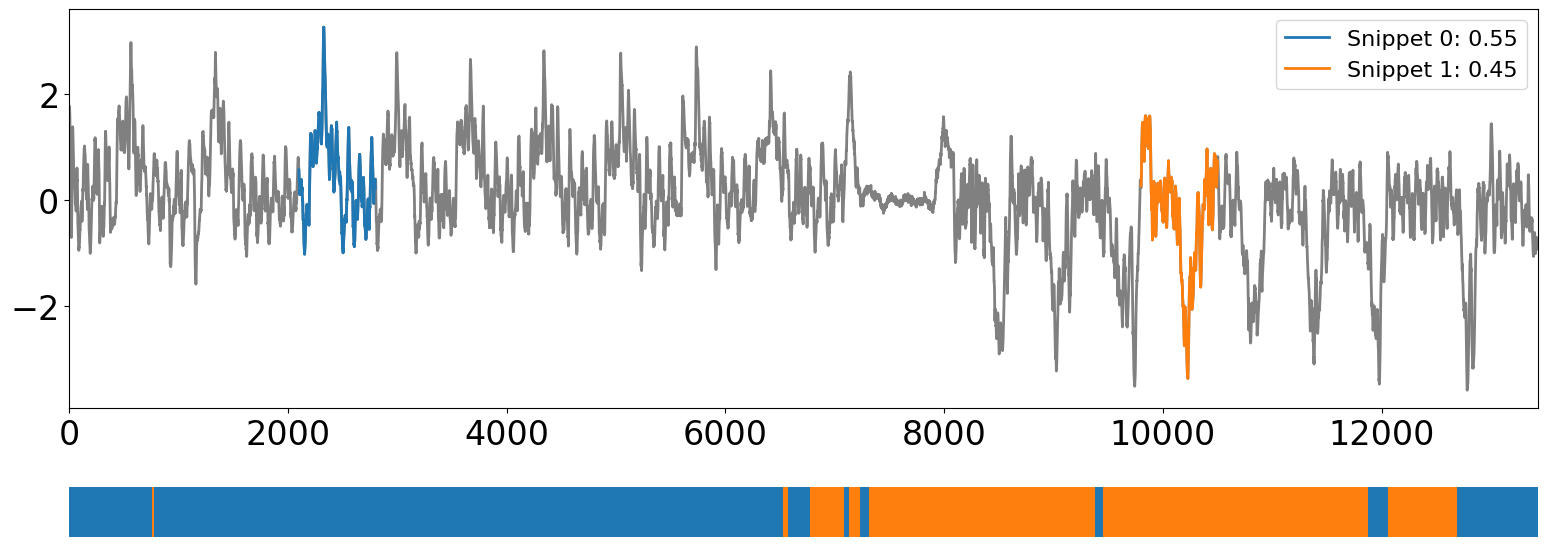

<Axes: >

In [12]:
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [113]:
print(filtered_df.iloc[:, 1])

95000     12.0
95001     12.0
95002     12.0
95003     12.0
95004     12.0
          ... 
108424    13.0
108425    13.0
108426    13.0
108427    13.0
108428    13.0
Name: 1, Length: 13429, dtype: float64


In [114]:
from sklearn.metrics import accuracy_score

labels = filtered_df.iloc[:, 1].to_numpy()

In [115]:
labels

array([12., 12., 12., ..., 13., 13., 13.])

In [116]:
labels = np.where(labels == 12, 0, labels)
labels = np.where(labels == 13, 1, labels)

In [117]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [118]:
predicted_labels = np.zeros_like(ts)

snippet_regimes = snp[-1]
for snippet_regime in snippet_regimes:
    predicted_labels[snippet_regime[1]:snippet_regime[2]] = snippet_regime[0]

In [119]:
accuracy = accuracy_score(labels, predicted_labels)
print("Точность (accuracy):", accuracy)

Точность (accuracy): 0.8713977213493186


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Точность равна 0.87, что говорит о том, что 87% меток активностей, предсказанных на основе сниппетов, совпадают с истинными метками.

Результаты показывают, что алгоритм способен автоматически выделять повторяющиеся и характерные движения. 

Из всего этого можно сделать вывод, что сниппеты позволяют кластеризовывать временные ряды.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [120]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/PAMAP/PAMAP.txt', delimiter=' ', header=None).T

filtered_df = df[(df.iloc[:, 0] > 1790) & (df.iloc[:, 0] < 1930)]

ts = filtered_df.iloc[:, 10:13].to_numpy()

In [121]:
ts

array([[ 0.705031 ,  1.71898  , -0.700965 ],
       [ 0.692769 ,  1.77469  , -0.700569 ],
       [ 0.636472 ,  1.76711  , -0.662454 ],
       ...,
       [ 0.0686987, -0.906756 , -0.217396 ],
       [ 0.0457952, -0.933207 , -0.279607 ],
       [ 0.116137 , -0.848108 , -0.37013  ]])

700


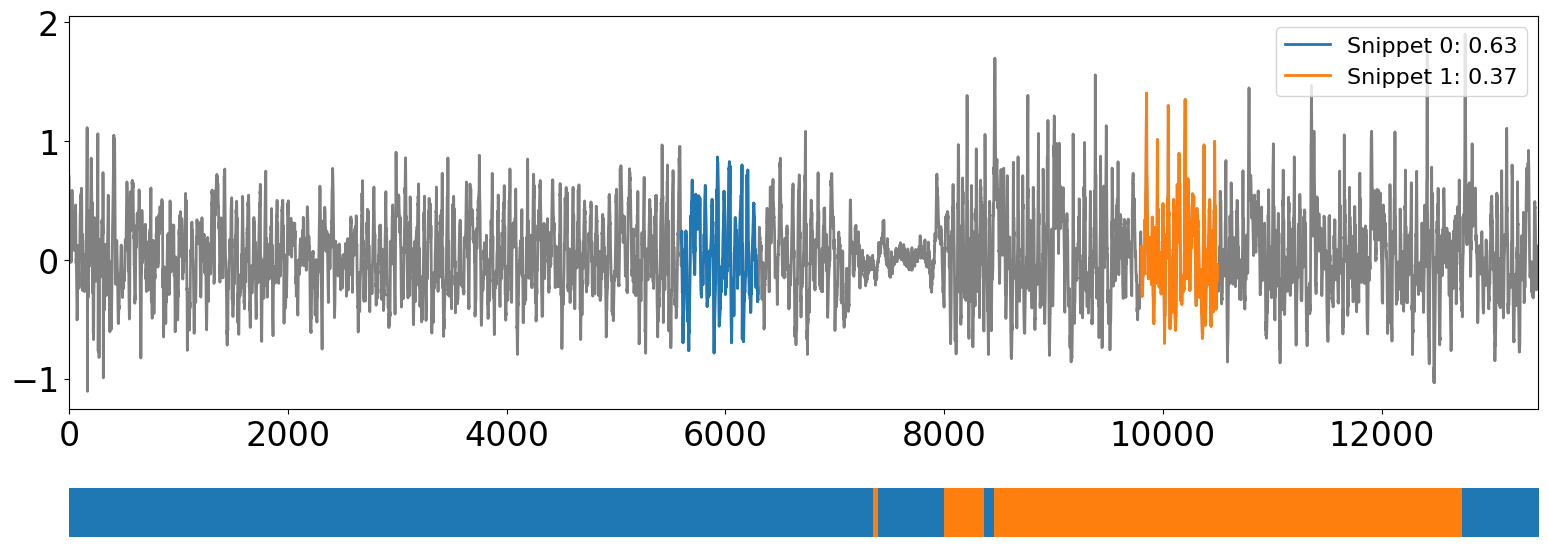

700


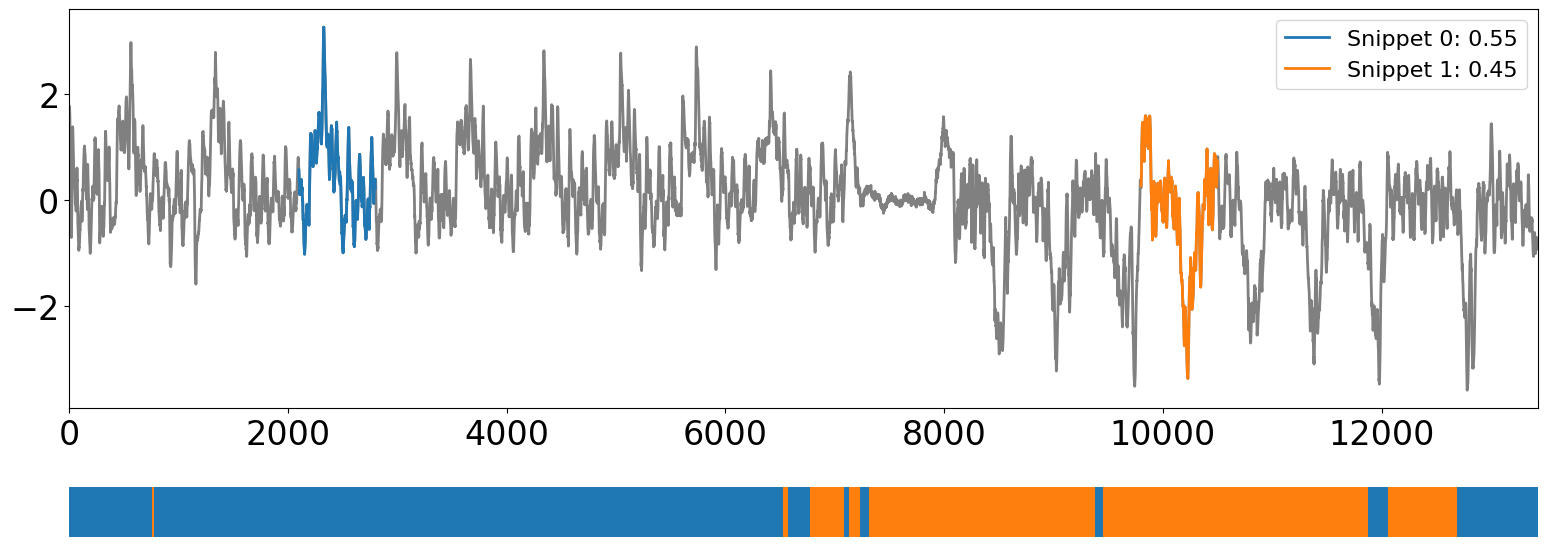

700


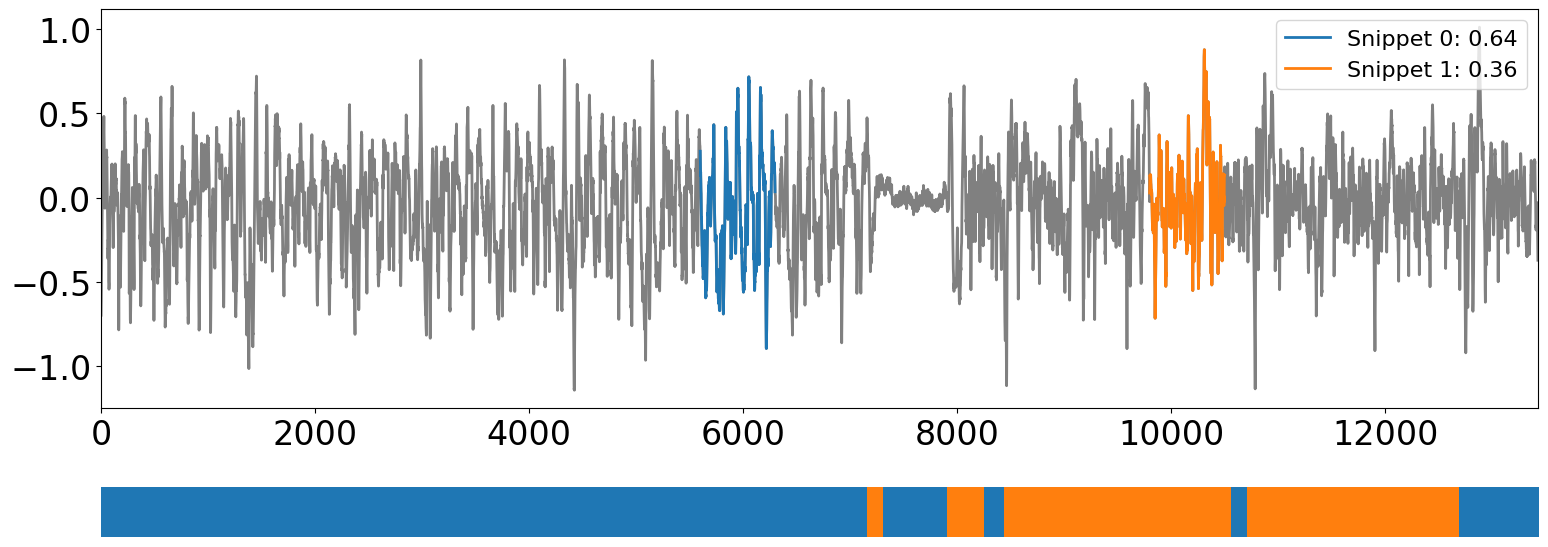

In [122]:
snp = []
for i in range(3):
    snp.append(snippets(ts[:, i], 700, 2, percentage=0.5))
    plot_snippets(ts[:, i], snp[i])

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [ ]:
# Получение метки по большинству голосов
def majority_vote_label(labels_matrix):
    majority_labels = []
    for row in labels_matrix:
        label_counts = {}
        for label in row:
            label_counts[label] = label_counts.get(label, 0) + 1
        majority_labels.append(max(label_counts, key=label_counts.get))
    return majority_labels

# Получение предсказанных меток
def predict_labels_from_snippets(snippets, time_series_shape):
    predicted_labels_matrix = np.zeros(time_series_shape)
    for i, snippet_set in enumerate(snippets):
        for j, snippet in enumerate(snippet_set):
            if isinstance(snippet, dict) and 'neighbors' in snippet:
                neighbors = np.array(snippet["neighbors"], dtype=int)
                for neighbor_index in neighbors:
                    if 0 <= neighbor_index < len(predicted_labels_matrix):
                        predicted_labels_matrix[neighbor_index][i] = j
    return predicted_labels_matrix

# Преобразование меток
def transform_predicted_labels(predicted_labels_matrix):
    transformed_labels_matrix = predicted_labels_matrix.copy()
    transformed_labels_matrix[:, 1] = np.where(transformed_labels_matrix[:, 1] == 0, 10, transformed_labels_matrix[:, 1])
    transformed_labels_matrix[:, 1] = np.where(transformed_labels_matrix[:, 1] == 1, 0, transformed_labels_matrix[:, 1])
    transformed_labels_matrix[:, 1] = np.where(transformed_labels_matrix[:, 1] == 10, 1, transformed_labels_matrix[:, 1])
    return transformed_labels_matrix

# Получение предсказанных меток
labels_pred_3d = predict_labels_from_snippets(snp, ts.shape)

# Преобразование меток
labels_pred_3d = transform_predicted_labels(labels_pred_3d)

# Получение итоговых меток
labels_pred = majority_vote_label(labels_pred_3d)

# Получение истинных меток
labels = filtered_df.iloc[:, 1].to_numpy()
labels = np.where(labels == 3, 1, labels)
labels = np.where(labels == 17, 0, labels)


In [ ]:
# Оценка точности
accuracy = accuracy_score(labels, labels_pred)
print(f'Точность классификации: {accuracy:.2f}')

Точность классификации: 0.79


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Полученная точность 0.79 говорит о  среднем уровене совпадения предсказанных и истинных меток. 

Многомерный ряд предоставляет более подробную информацию, но может содержать больше шума,а одномерный ряд упрощает предсказания, делая их более устойчивыми, но при этом может утрачивать часть данных.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

In [57]:
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt')

In [58]:
start_time = 1790
end_time = 1930

In [59]:
# Временные метки
timestamp = data[0]

In [60]:
# Данные гироскопа по осям X, Y и Z
x = data[10] 
y = data[11] 
z = data[12] 

filteredx = x[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredy = y[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredz = z[np.where((timestamp >= start_time) & (timestamp <= end_time))]

In [61]:
profileareas = []

for K in range(1, 10):
    xsnp, ysnp, zsnp = (snippets(data, 600, K, percentage=0.5) for data in (filteredx, filteredy, filteredz))

    profilearea = np.min([xsnp[-2][k] + ysnp[-2][k] + zsnp[-2][k] for k in range(K)])

    profileareas.append(profilearea)

In [62]:
changes = [profileareas[k - 1] / profileareas[k] - 1 for k in range(1, 9)]

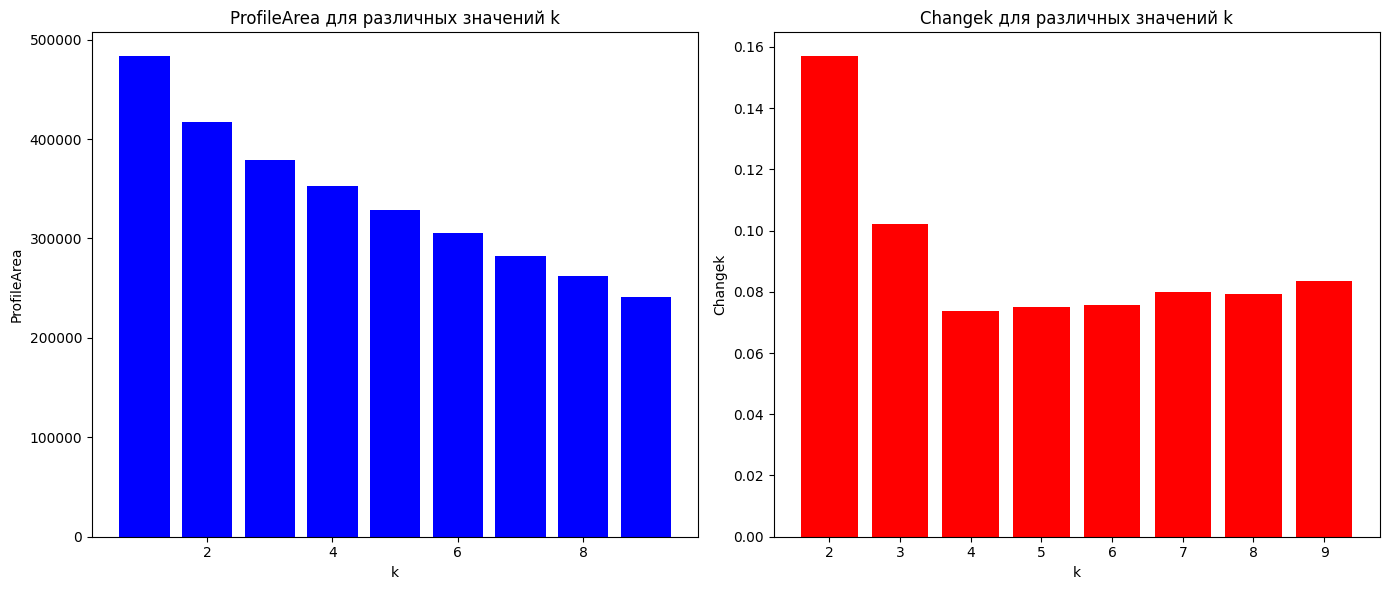

In [63]:
kvalues = np.arange(1, 10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(kvalues, profileareas, color='blue')
ax1.set_title('ProfileArea для различных значений k')
ax1.set_xlabel('k')
ax1.set_ylabel('ProfileArea')

ax2.bar(kvalues[1:], changes, color='red')
ax2.set_title('Changek для различных значений k')
ax2.set_xlabel('k')
ax2.set_ylabel('Changek')

plt.tight_layout()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?

Наилучшее значение k = 2 следует, из-за наибольшего значения Change.